# Рынок заведений общественного питания Москвы

Контекст.

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?


Цель - подготовить исследование рынка.
Объект исследования - данные о заведениях общественного питания в Москве.

## Описание данных
Таблица rest_data:
Путь к файлу: /datasets/rest_data.csv

    object_name — название объекта общественного питания;
    chain — сетевой ресторан;
    object_type — тип объекта общественного питания;
    address — адрес;
    number — количество посадочных мест.

## План действий
1. Предподготовка данных
2. Анализ данных

    Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.
    
    Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.
    
    Для какого вида объекта общественного питания характерно сетевое распространение?
    
    Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
    
    Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
    
    Выделите в отдельный столбец информацию об улице из столбца address .
    
    Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
    
    Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
    
    Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?
    
3. Дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Оценить возможность развития сети.

4. Подготовка презентации

In [1]:
import matplotlib.pyplot as plt # выгружаем необходимые библиотеки
import pandas as pd
import numpy as np
from math import factorial
from scipy import stats as st
import math as mt
from functools import reduce
import seaborn as sb
import plotly.express as px
from plotly import graph_objects as go
import pandas as pd
import requests # Импорт библиотеки для запросов к серверу
from bs4 import BeautifulSoup # Импорт библиотеки для автоматического парсинга странички
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #изменение глобальной настройки отображения 

In [3]:
pd.set_option('display.max_colwidth', -1)

In [4]:
rest = pd.read_csv('/datasets/rest_data.csv')

In [5]:
print(rest.head(15)) 

        id               object_name chain object_type  \
0   151635  СМЕТАНА                   нет   кафе         
1   77874   Родник                    нет   кафе         
2   24309   Кафе «Академия»           нет   кафе         
3   21894   ПИЦЦЕТОРИЯ                да    кафе         
4   119365  Кафе «Вишневая метель»    нет   кафе         
5   27429   СТОЛ. ПРИ ГОУ СОШ № 1051  нет   столовая     
6   148815  Брусника                  да    кафе         
7   20957   Буфет МТУСИ               нет   столовая     
8   20958   КПФ СЕМЬЯ-1               нет   столовая     
9   28858   Столовая МТУСИ            нет   столовая     
10  148595  Пекарня 24                нет   закусочная   
11  23394   Гогиели                   нет   кафе         
12  28582   ШКОЛА 735                 нет   столовая     
13  22579   Алло Пицца                да    кафе         
14  23670   Гимназия 1542             нет   столовая     

                                                address  number  
0   г

In [6]:
rest['object_name'] = rest['object_name'].str.lower()

In [7]:
print(rest.head(15)) 
display(rest.info())


        id               object_name chain object_type  \
0   151635  сметана                   нет   кафе         
1   77874   родник                    нет   кафе         
2   24309   кафе «академия»           нет   кафе         
3   21894   пиццетория                да    кафе         
4   119365  кафе «вишневая метель»    нет   кафе         
5   27429   стол. при гоу сош № 1051  нет   столовая     
6   148815  брусника                  да    кафе         
7   20957   буфет мтуси               нет   столовая     
8   20958   кпф семья-1               нет   столовая     
9   28858   столовая мтуси            нет   столовая     
10  148595  пекарня 24                нет   закусочная   
11  23394   гогиели                   нет   кафе         
12  28582   школа 735                 нет   столовая     
13  22579   алло пицца                да    кафе         
14  23670   гимназия 1542             нет   столовая     

                                                address  number  
0   г

None

In [8]:
print('Количество пропусков в таблце:', rest.isnull().sum())
print('Количество дубликатов в таблце:',rest.duplicated(subset=['object_name','chain','object_type',\
                                                                'address','number'],keep='first').sum())
rest = rest.drop_duplicates(subset=['object_name','chain','object_type','address','number'],keep='first')
print('Количество дубликатов в таблце:',rest.duplicated(subset=['object_name','chain','object_type',\
                                                                'address','number'],keep='first').sum())

Количество пропусков в таблце: id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64
Количество дубликатов в таблце: 85
Количество дубликатов в таблце: 0


### Поиск выброов

In [9]:
def info_graf(data,row):
    "Изучает основную информацию по столбцу"
    "Использует межквартильный размах для определения диапазона построения графика. Работает от 5 до 10 сек."
    print(row.describe())
    row.hist(bins='auto',range = (row.min(), row.max()))
    plt.show()
    row.hist(bins='auto',range = (row.min(), row.quantile(.33)))
    plt.show()
    row.hist(bins='auto',range = (row.quantile(.33), row.quantile(.66)))
    plt.show()
    row.hist(bins='auto',range = (row.quantile(.66), row.max()))
    plt.show()
    data.boxplot(row.name)

count   15281.000
mean    59.788   
std     74.843   
min     0.000    
25%     14.000   
50%     40.000   
75%     80.000   
max     1700.000 
Name: number, dtype: float64


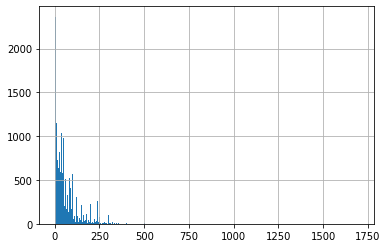

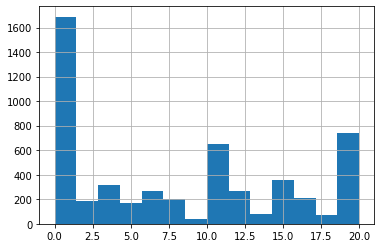

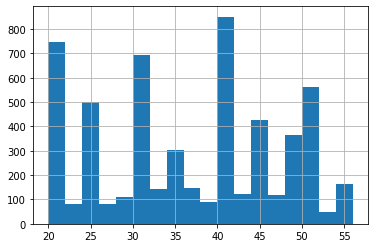

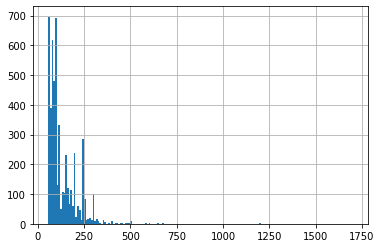

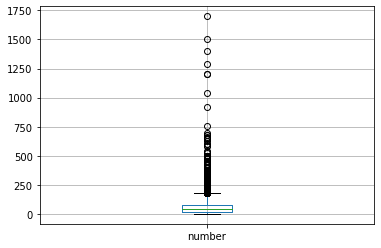

In [10]:
info_graf(rest,rest['number'])
# первичный анализ данных. Стандартное отклонение высокое- 19.
# Барплот говорит о большом количестве выбросов.
# Стандартное количество мест выше медианного показателя. На отклонение влияет максимальное значение в столбце,
# которое значительно увеличивает средний показатель по метражу объектов.

In [11]:
print(len(rest.query('number >= 250')) / len(rest)) #Как видим, количество объектов с посадкой больше 250 мест
# меньше 0.02% от общего объема данных. Возможно в выборку попали банкетные залы с расширенной посадкой, но для 
# повышени корректности дальнейшего расчета, ограничим данные анализа заведениями посадкой с количеством мест 
#меньше 270. 

0.023885871343498462


In [12]:
rest = rest.query('number <= 250')

Типы данных корректны, пропуски и дубликаты отсутствуют. Датасет готов к дальнейшему анализу.

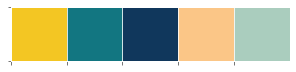

In [13]:
plt.style.use('ggplot')

flatui = ['#f3c623', '#127681', '#10375c', '#fbc687', '#aacdbe']
sb.palplot(sb.color_palette(flatui))
sb.set_palette('colorblind')# определим единый стиль графиков

### Cоотношение видов объектов общественного питания по количеству

In [14]:
rest['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

In [15]:
fig = go.Figure(
    data=[go.Pie(labels=['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], values=rest['object_type'].value_counts())])
fig.show()

Основной тип заведений Москвы - кафе. Учитывая, что исходные данные не разделяют кафе общего типа и специализированные, данный вид имеет довольно широкий спектр заведений. Их объединяет более ограниченный
ассортимент продукции, чем в ресторане. Так же, относительно широко представлены заведения низкой ценовой категории - столовые, закусочные и предприятие быстрого обслуживания. Данные заведения жертвуют объемом ассортимента, уровнем обслуживания в пользу скорости обслуживания, широкой целевой аудитории и частотой посещения. В меньшем объеме представлены категории более специализированные, отличающиеся определенным ассортиментом(ресторан, бар, кафетерий) или привязкой к другим заведениям(буфет, отдел кулинарии).

### Cоотношение сетевых и несетевых заведений по количеству

In [16]:
rest.chain.value_counts()

нет    12064
да     2931 
Name: chain, dtype: int64

In [17]:
fig = go.Figure(
    data=[go.Pie(labels=['Несетевые', 'Cетевые'], values=rest['chain'].value_counts())])
fig.show()

Подавляющее большинство заведений имеет статус несетевого.

### Для какого вида объекта общественного питания характерно сетевое распространение?

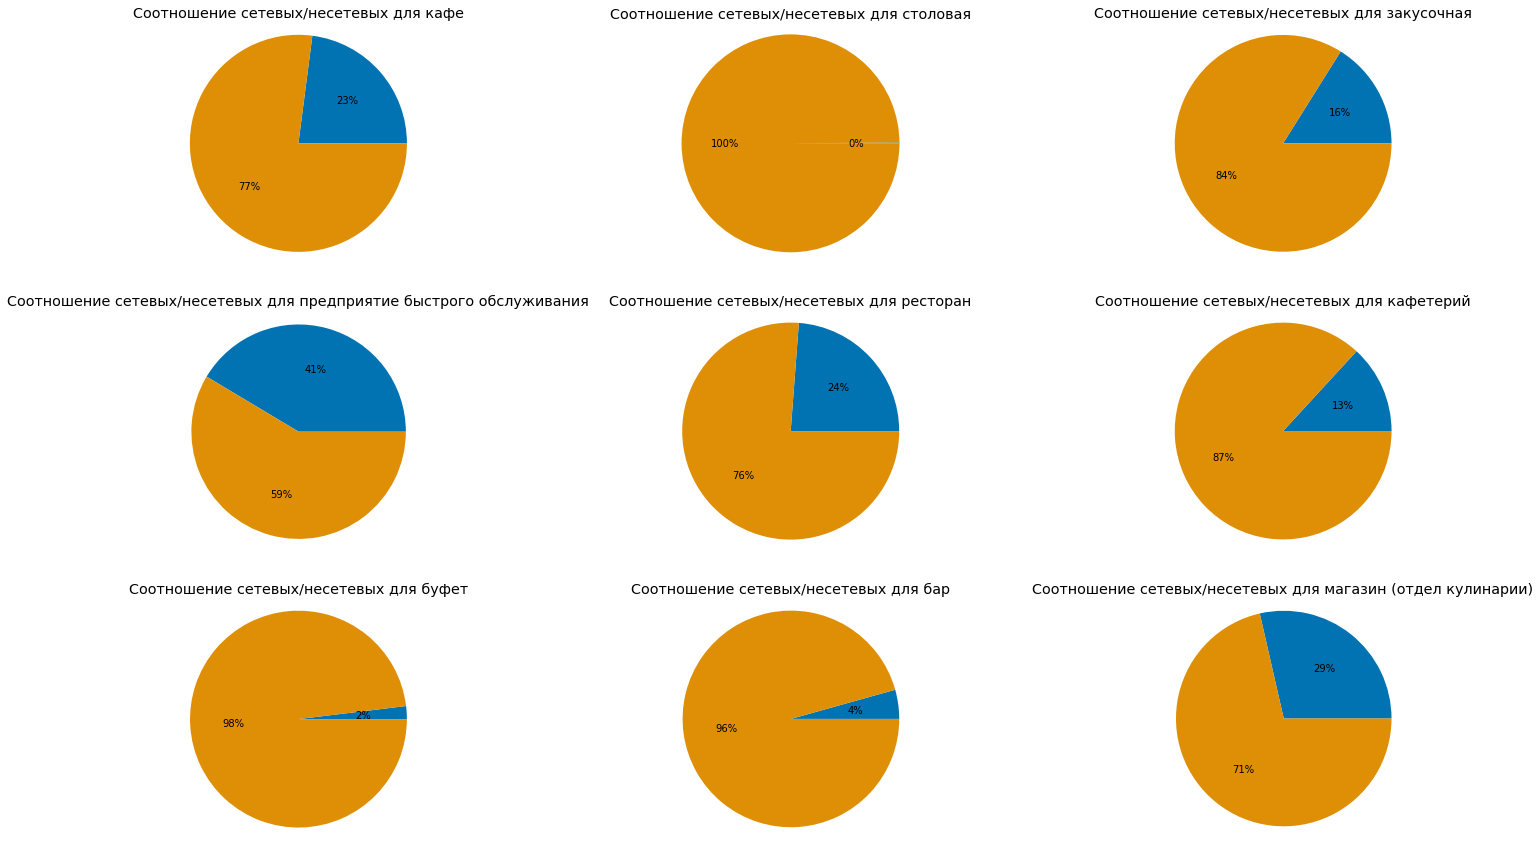

In [18]:
test = rest.groupby(['object_type', 'chain']).agg({'object_type': 'count'})

list_of_types = ['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)']
 
# задаем координатную сетку 3 строки 3 столбца
fig, ax = plt.subplots(3,3, figsize = (25,15))

ax = ax.ravel()
 
# переменная счетчик порядкового номера графика
ax_num = 0
 
for object_type in list_of_types:
    ax[ax_num].pie(test.loc[object_type], autopct = '%1.0f%%')
    ax[ax_num].set_title('Соотношение сетевых/несетевых для {}'.format(object_type))
    ax[ax_num].axis('equal')
    ax_num += 1
plt.show()


Большинство заведений несет несетевое распространение. Сетевое распространение наиболее характерно для предприятий быстрого питения, отделов кулинарии (вероятно в сетевых магазинах), ресторанов и кафе. Предприятие быстрого обслуживания, как тип заведения, наиболее перспективен для масштабирования бизнеса.

### Посадочные места в сетевых заведениях

In [19]:
chain_rest = rest.query('chain == "да"') # отдельнос охраняем сетевые заведения
chain_rest['object_name'].unique()

array(['пиццетория', 'брусника', 'алло пицца', 'суши wok', 'тануки',
       "домино'с пицца", 'готика', 'му-му', 'хлеб насущный', 'tajj mahal',
       'данкин донатс', 'вареничная №1', 'шоколадница', 'теремок',
       'хинкальная', 'шантимель', 'хинкальная city', 'кружка', 'суши вок',
       'примавера', 'виктория', 'пиццерия «академия»', 'чебуречная ссср',
       'grand cru', 'чайхона №1', 'панчо пицца', 'kfc', 'сабвей',
       'ресторан «якитория»', 'советские времена', 'кафе «андерсон»',
       'кафе «subway»', 'ресторан «макдоналдс»', 'макдоналдс', 'суши сет',
       'шоколад', 'тирольские пироги', 'гамбринус', 'пицца фабрика',
       'subway', 'кафе «якитория»', 'кафе «тануки»', 'сити пицца',
       'кофе хаус',
       'кулинарная лавка братьев караваевых братья караваевы', 'прайм',
       'пицца экспресс', 'шоколадница кофе хаус', 'николай', 'якитория',
       'магнолия', 'кофе с собой', 'джаганнат', 'волконский', 'moskalyan',
       'гино-но-таки', 'тратория semplice', 'ньокки',

In [20]:
chain_rest['object_name'].value_counts()

шоколадница                                     157
kfc                                             154
макдоналдс                                      148
бургер кинг                                     137
теремок                                         94 
                                                .. 
пицца «паоло»                                   1  
кафе «чайхана тапчан»                           1  
«кафе «кулинарная лавка братьев караваевых»»    1  
территория timbigfamily                         1  
хачапури, одесса -мама                          1  
Name: object_name, Length: 571, dtype: int64

In [21]:
glossary = {'кафе ':'', 'ресторан':'', '«':'', '»':'', 'бар- буфет':'', '. экспрессо и капучино бар':'',\
            'кофейня':'', 'шоколадница кофе хаус':'кофе хаус', '-':'', 'кафе пекарня ':'', 'бар-буфет ':'',\
           'starbucks':'старбакс', 'costa coffee': 'коста кофе', 'праймкафе ':'прайм', ' (кондитерские)':'',\
           'фитнес-бар ':'', 'предприятие быстрого обслуживания ':'','пиццерия':'', 'кондитерская-пекарня ':'',\
           ' азс №16':'', ' азс №17':'', 'prime': '', 'vietcafe ':'', 'пицца ':'', 'ростикс kfc':'kfc',\
           'kfc волгоградский':'kfc', 'чайхона №1 бутово': 'чайхона №1', 'пбо «kfc покрышкина»':'kfc',\
            'кафе «кофейня старбакс»':'старбакс', 'кофейня «старбакс кофе»': 'старбакс', 'ресторан«макдоналдс»':\
           'макдоналдс', 'бар ':'', 'старбакс кофе':'старбакс', 'закусочная ':'', 'starbucks кофе':'старбакс',\
           'ресторан быстрого питания ':'', 'павлин мавлин чайхона №1':'чайхона №1', 'кофешоп ':'', ' гудвин':\
           '', 'сеть магазинов ':'', 'дабл би блэк':'дабл би', 'кафе-пекарея ':'', 'кальян- бар ':'',\
           'кальян-бар ':'', 'кальянная ':'', 'мск московская сеть кальянных на шаболовке':'мск', 'cемейное кафе ':\
           '', 'магазин готовой еды ':'', 'готовые блюда ':'', 'мята lounge октябрьская':'мята lounge',\
           'мята':'мята lounge', ' kfc':'kfc', 'prime ':'', ' стар':'', 'праймкафе прайм стар':'прайм', 'prime':\
           '','-кафе':'', 'стар':'', '(':'', ')':'', 'deli by prime прайм-кафе':'прайм'}
def clear_name(row):
    new_name = row['object_name']
    
    for bad_word in glossary:
        new_name = str(new_name).replace(bad_word, glossary[bad_word])
    return new_name
chain_rest['object_name'] = chain_rest.apply(clear_name, axis=1)    

In [22]:
chain_rest['object_name'].value_counts()

kfc                                 183
шоколадница                         173
макдоналдс                          161
бургер кинг                         149
теремок                             107
                                   ... 
при азс bp                          1  
мимино хинкальная                   1  
мята lounge lounge автозаводская    1  
папа джонс пицца                    1  
бб энд бургерс в&в бургер           1  
Name: object_name, Length: 442, dtype: int64

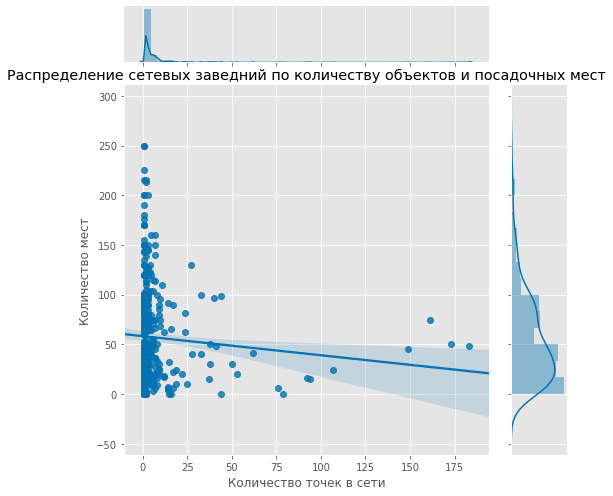

In [23]:
count_object = chain_rest.groupby('object_name').agg({'object_name' : 'count', 'number' : 'median'})

#диаграмма распределения
sb.jointplot(x='object_name', y='number', data=count_object, kind='reg', height=7, space=0.4)
plt.title('Распределение сетевых заведний по количеству объектов и посадочных мест')
plt.xlabel("Количество точек в сети")
plt.ylabel('Количество мест');

Прямой и обратной зависимости между показателями нет. В условиях исходных данных, группировка по названию заведений определила сети, которые в конкретном городе представлены одной точкой. Определим количество точек меньше 10 - мало. Большое количество мест - больше 50. Укрупним график распределения, чтобы подробнее рассмотреть показатели.

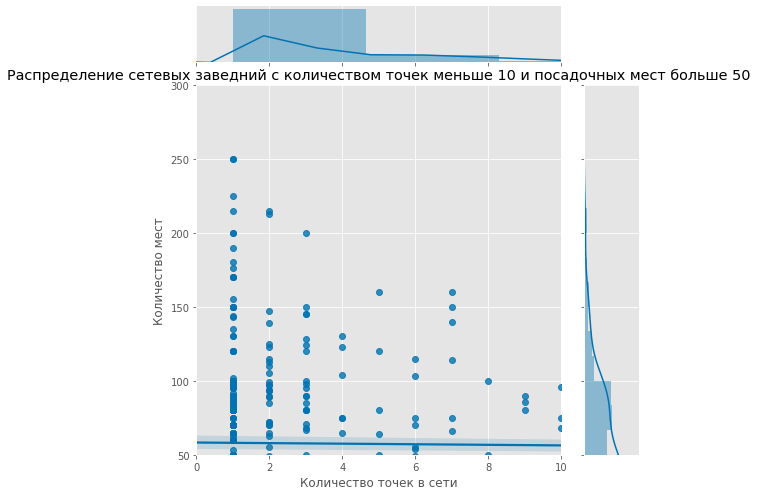

In [24]:

#диаграмма распределения
sb.jointplot(x='object_name', y='number', data=count_object, kind='reg', height=7, space=0.4)
plt.title('Распределение сетевых заведний с количеством точек меньше 10 и посадочных мест больше 50')
plt.xlabel("Количество точек в сети")
plt.ylabel('Количество мест')
plt.axis([0, 10, 50, 300]);

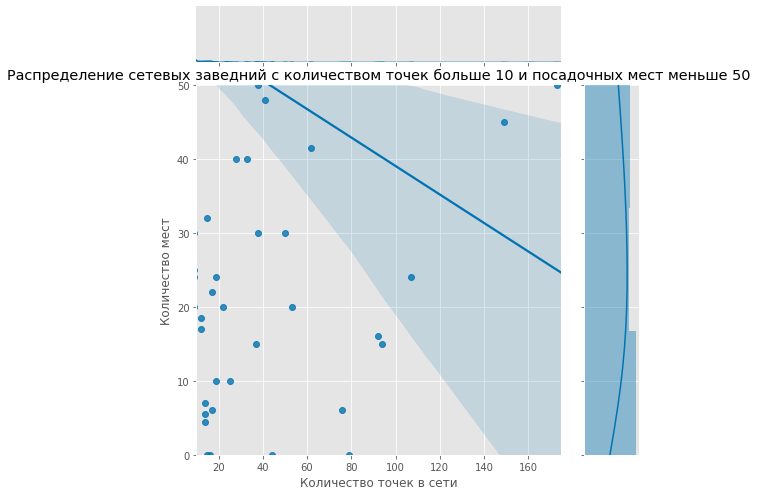

In [25]:

#диаграмма распределения
sb.jointplot(x='object_name', y='number', data=count_object, kind='reg', height=7, space=0.4)
plt.title('Распределение сетевых заведний с количеством точек больше 10 и посадочных мест меньше 50')
plt.xlabel("Количество точек в сети")
plt.ylabel('Количество мест')
plt.axis([10, 175, 0, 50]);

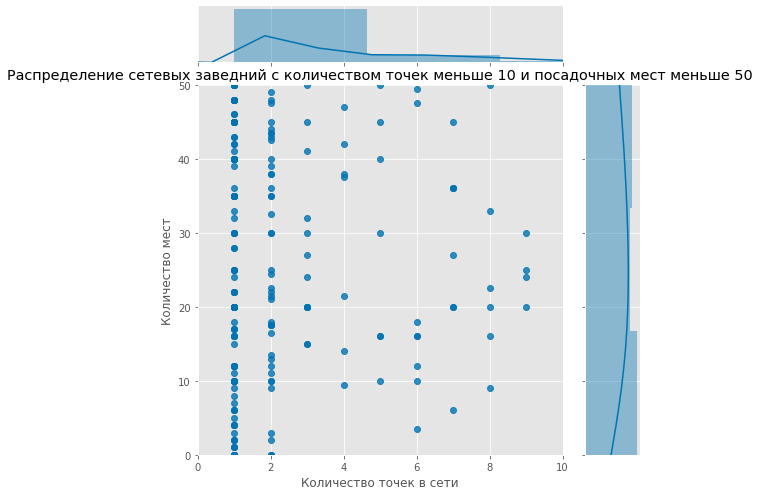

In [26]:
#диаграмма распределения
sb.jointplot(x='object_name', y='number', data=count_object, kind='reg', height=7, space=0.4)
plt.title('Распределение сетевых заведний с количеством точек меньше 10 и посадочных мест меньше 50')
plt.xlabel("Количество точек в сети")
plt.ylabel('Количество мест')
plt.axis([0, 10, 0, 50]);

В условиях исходных данных, можно сделать вывод о том, что для сетевых заведений в рамках одного города более характерно мало заведений (меньше 10 точек в городе) с меньшим количеством посадочных мест (меньше 50).

###  Какой вид предоставляет в среднем самое большое количество посадочных мест?

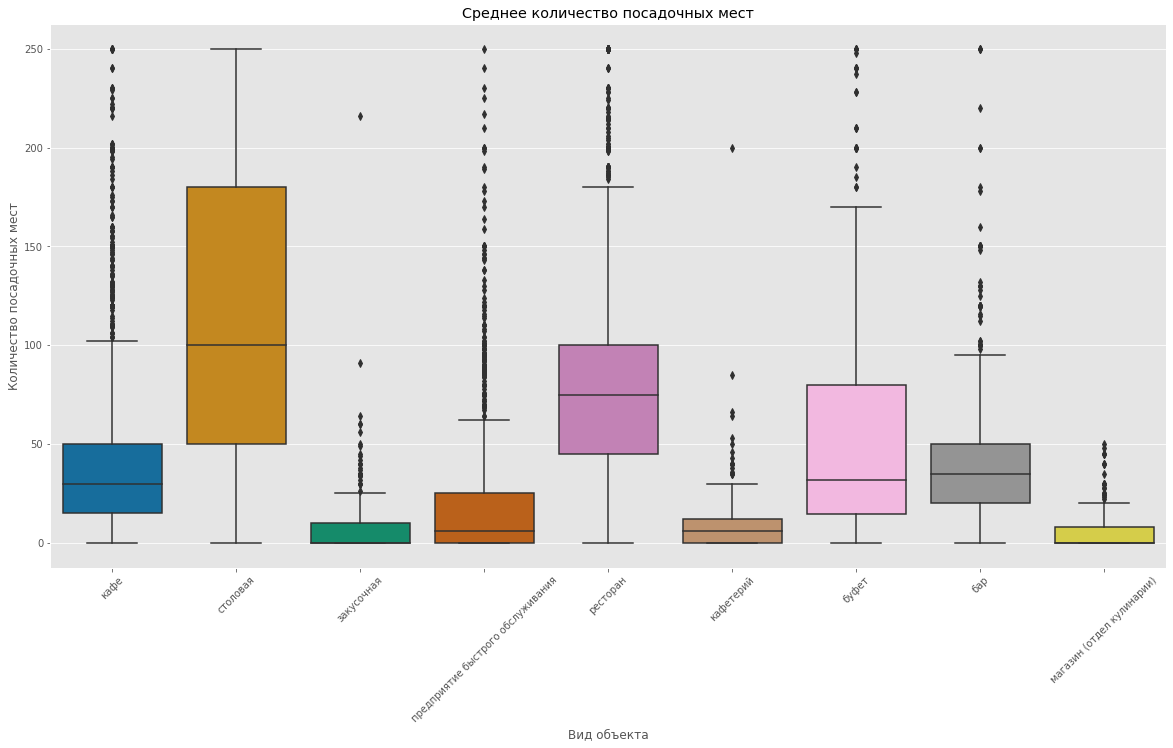

In [27]:
#строим барплот с количеством посадочных мест по категориям
plt.figure(figsize=(20, 10))
plt.xticks(rotation= 45)
sb.boxplot(x="object_type", y="number", data=rest)
plt.title('Среднее количество посадочных мест')
plt.xlabel('Вид объекта')
plt.ylabel('Количество посадочных мест');



Самое большое среднее количество посадочных мест характерно для столовых и ресторанов (больше 100).

### Улица объекта

In [28]:
streets_names = ['улица','проспект','шоссе','проезд',
                 'бульвар','переулок','набережная','площадь','вал','аллея','квартал',
                 'линия','микрорайон','тупик','поселение', 'Зеленоград', 'километр', 'территория', 'Лучевой',
                'посёлок']
 
def get_street(address):
    for position in [0,1,2]:
        for address_part in address.split(',')[position].split(' '):          
            if address_part in streets_names:
                street = address.split(', ')[position]
                return street
           
rest['street'] = rest['address'].apply(get_street)
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14995 entries, 0 to 15365
Data columns (total 7 columns):
id             14995 non-null int64
object_name    14995 non-null object
chain          14995 non-null object
object_type    14995 non-null object
address        14995 non-null object
number         14995 non-null int64
street         14995 non-null object
dtypes: int64(2), object(5)
memory usage: 1.5+ MB


География объектов максимально широкая. Необходимо определиться с примерным районом для открытия.

In [29]:
rest['street'] = rest['street'].str.lower()

### Район объекта

In [30]:
URL = 'http://mosopen.ru/streets'
mosopen = requests.get(URL)
soup = BeautifulSoup(mosopen.text, 'lxml')
regions_links = soup.find("table", {'class':'regions_list'})
children_regions_links = regions_links.findChildren("a")
links_regions = {}

for child in children_regions_links:
    links_regions[child.text] = child['href']
    
#links_regions 

In [31]:
page_data = {}
def try_cache(url):
    sp = None
    if url in page_data.keys():
        sp = page_data[url]
    else:      
        req = requests.get(url)
        sp = BeautifulSoup(req.text, 'lxml')
        page_data[url] = sp
    return sp

In [32]:
def streets_by_region(url):
    parsed_page = try_cache(url)
    streets_links = parsed_page.findAll(lambda tag: tag.name=='a' and 'street/' in tag['href'])
    streets = []
    for link in streets_links:
        streets.append(link.text)
    return streets

In [33]:
streets_with_regions = {} #нужно подождать

for region in links_regions:
    url = links_regions[region]
    streets = streets_by_region(url)
    
    for street in streets:
        processed_street_name = street.lower().replace(",", "")
        streets_with_regions[processed_street_name] = region

In [34]:
def find_regions_by_street(row):
    search = row ['street']
    search_tokens = search.split(" ")

    for key in streets_with_regions:
        key_tokens = key.split(" ")
        if all(token in key_tokens for token in search_tokens):
            return streets_with_regions[key]
    return "Not Moskva"

In [35]:
rest['region'] = rest.apply(find_regions_by_street, axis = 1) # нужно подождать чуть дольше
rest.head()

,id,object_name,chain,object_type,address,number,street,region
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица егора абакумова,Ярославский
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица талалихина,Бутово Южное
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,абельмановская улица,Таганский
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,абрамцевская улица,Лианозово
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,абрамцевская улица,Лианозово


### Топ-10 улиц по количеству объектов 

In [36]:
top = rest.query('street != "город зеленоград" & street != "поселение" & street != "километр" & street !=\
"территория" & street != "лучевой" & street != "посёлок" & street != "поселение сосенское"').\
groupby('street')['street'].count()
#  Группируем все адреса и находим их кол-во. Ограничим выборку по адресам, входящим в черту города, отбросив
#населенные пункты.
top = top.sort_values(ascending = False) # с помощью сортировки находим ТОП 
top_10 = ['проспект мира', 'профсоюзная улица', 'ленинградский проспект', 'пресненская набережная',
          'варшавское шоссе', 'ленинский проспект','проспект вернадского', 'кутузовский проспект',
          'каширское шоссе', 'кировоградская улица']
rest_top_10 = rest.query('street == @top_10')

rest_top_10

,id,object_name,chain,object_type,address,number,street,region
151,155973,кафе «андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,варшавское шоссе,Чертаново Южное
152,23618,кафе «subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,варшавское шоссе,Чертаново Южное
153,155852,кафе «ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,варшавское шоссе,Чертаново Южное
154,152556,шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,варшавское шоссе,Чертаново Южное
155,120658,выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,варшавское шоссе,Чертаново Южное
...,...,...,...,...,...,...,...,...
15308,213629,додо пицца,да,кафе,"город Москва, Пресненская набережная, дом 12",25,пресненская набережная,Пресненский
15325,198436,милти,да,предприятие быстрого обслуживания,"город Москва, Ленинградский проспект, дом 80, корпус 17",0,ленинградский проспект,Хорошёвский
15347,222491,кальянная «мята lounge»,да,кафе,"город Москва, Профсоюзная улица, дом 142, корпус 1, строение 1",40,профсоюзная улица,Ясенево
15350,213061,мята,да,кафетерий,"город Москва, Каширское шоссе, дом 96, корпус 1",35,каширское шоссе,Орехово-Борисово Южное


                   street                  region   id
2  кировоградская улица    Чертаново Южное         104
1  каширское шоссе         Орехово-Борисово Южное  107
3  кутузовский проспект    Фили-Давыдково          111
7  проспект вернадского    Тропарёво-Никулино      126
5  ленинский проспект      Якиманка                145
0  варшавское шоссе        Чертаново Южное         158
6  пресненская набережная  Пресненский             164
4  ленинградский проспект  Хорошёвский             170
9  профсоюзная улица       Ясенево                 182
8  проспект мира           Ярославский             201


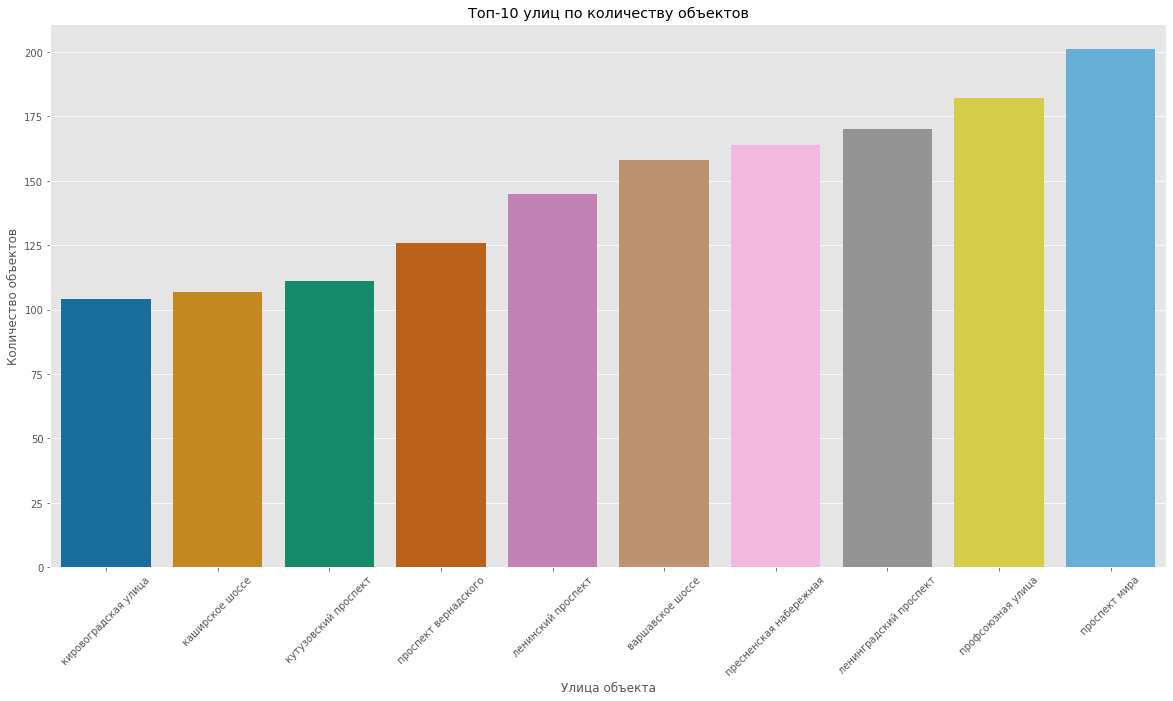

In [37]:
count_top = rest_top_10.pivot_table(index=['street', 'region'], values='id', aggfunc=\
                                    'count').reset_index().sort_values(by='id')
print(count_top)

plt.figure(figsize=(20, 10))
plt.xticks(rotation= 45)
sb.barplot(x="street", y="id", data=count_top)
plt.title('Топ-10 улиц по количеству объектов')
plt.xlabel('Улица объекта')
plt.ylabel('Количество объектов');

Основная часть заведений находится в южной, северной, центральной и западном районах города.

### Улицы с одним объектом общественного питания

In [38]:
anti_top = rest.pivot_table(index=['region', 'street'], values='id', aggfunc='count').reset_index().\
query('id == 1 & region!= "Not Moskva"')
anti_top_list = anti_top.region.unique()
anti_top_list = ['Алексеевский', 'Алтуфьевский', 'Арбат', 'Аэропорт',
       'Бабушкинский', 'Басманный', 'Беговой', 'Бескудниковский',
       'Бирюлёво Восточное', 'Богородское', 'Бутово Северное',
       'Бутово Южное', 'Бутырский', 'Вешняки', 'Внуково', 'Войковский',
       'Восточный', 'Выхино-Жулебино', 'Гагаринский', 'Головинский',
       'Гольяново', 'Даниловский', 'Дегунино Западное', 'Дмитровский',
       'Донской', 'Дорогомилово', 'Замоскворечье', 'Зюзино', 'Ивановское',
       'Измайлово', 'Измайлово Восточное', 'Измайлово Северное',
       'Коньково', 'Коптево', 'Косино-Ухтомский', 'Котловка',
       'Красносельский', 'Кузьминки', 'Кунцево', 'Куркино',
       'Левобережный', 'Лефортово', 'Лианозово', 'Лосиноостровский',
       'Люблино', 'Марфино', 'Марьина роща', 'Марьино',
       'Медведково Северное', 'Медведково Южное', 'Метрогородок',
       'Мещанский', 'Митино', 'Можайский', 'Молжаниновский',
       'Нагатино-Садовники', 'Нагорный', 'Некрасовка', 'Нижегородский',
       'Ново-Переделкино', 'Новогиреево', 'Обручевский', 'Останкинский',
       'Отрадное', 'Очаково-Матвеевское', 'Перово', 'Печатники',
       'Покровское-Стрешнево', 'Преображенское', 'Пресненский', 'Раменки',
       'Ростокино', 'Рязанский', 'Савёловский', 'Свиблово', 'Северный',
       'Сокол', 'Соколиная гора', 'Сокольники', 'Солнцево', 'Строгино',
       'Таганский', 'Тверской', 'Текстильщики', 'Тимирязевский',
       'Тушино Южное', 'Фили-Давыдково', 'Филёвский парк', 'Хамовники',
       'Хорошёво-Мневники', 'Хорошёвский', 'Царицыно',
       'Чертаново Северное', 'Чертаново Южное', 'Черёмушки', 'Щукино',
       'Южнопортовый', 'Якиманка', 'Ярославский', 'Ясенево']

In [39]:
anti_top = anti_top.query('region == @anti_top_list')
anti_top_10 = anti_top.groupby('region')['region'].count()
anti_top_10.sort_values(ascending = False).head(10)
anti_top_10_list = ['Таганский', 'Хамовники', 'Басманный', 'Тверской', 'Пресненский', 'Марьина роща',\
                    'Замоскворечье', 'Мещанский', 'Соколиная гора', 'Лефортово']

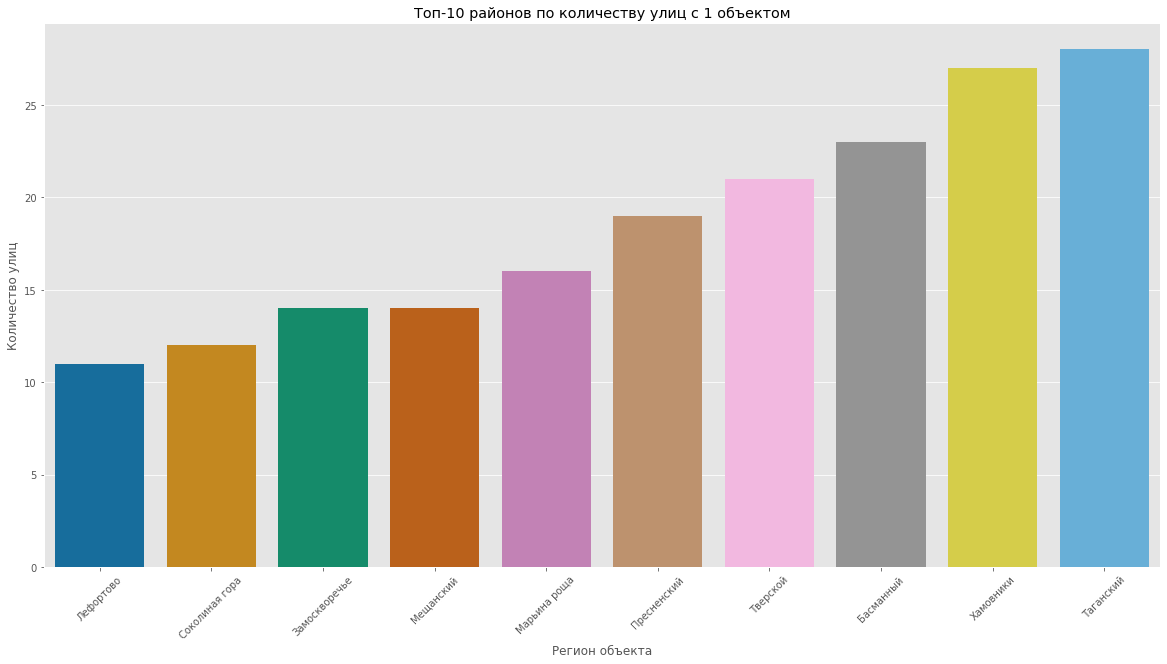

In [40]:
anti_top_region = anti_top.query('region == @anti_top_10_list').pivot_table(index='region', values='id',\
                                                                        aggfunc='count').reset_index().sort_values(by='id')
anti_top_region
plt.figure(figsize=(20, 10))
plt.xticks(rotation= 45)
sb.barplot(x="region", y="id", data=anti_top_region)
plt.title('Топ-10 районов по количеству улиц с 1 объектом')
plt.xlabel('Регион объекта')
plt.ylabel('Количество улиц');

Центральный Пресненский район включает в себя улицу с одной из самых высоких плотностей по наличию заведений и,одновременно, 19 улиц с 1 объектом. Данная улица популярна среди гостей и владельцев заведений, при этом, вероятно, места для возможной аренды помещения стоит искать именно в этом районе, т.к. это место обеспечит высокую проходимость целевой аудитории.

### Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания

count   1468.000
mean    50.283  
std     52.173  
min     0.000   
25%     12.000  
50%     36.000  
75%     70.000  
max     250.000 
Name: number, dtype: float64


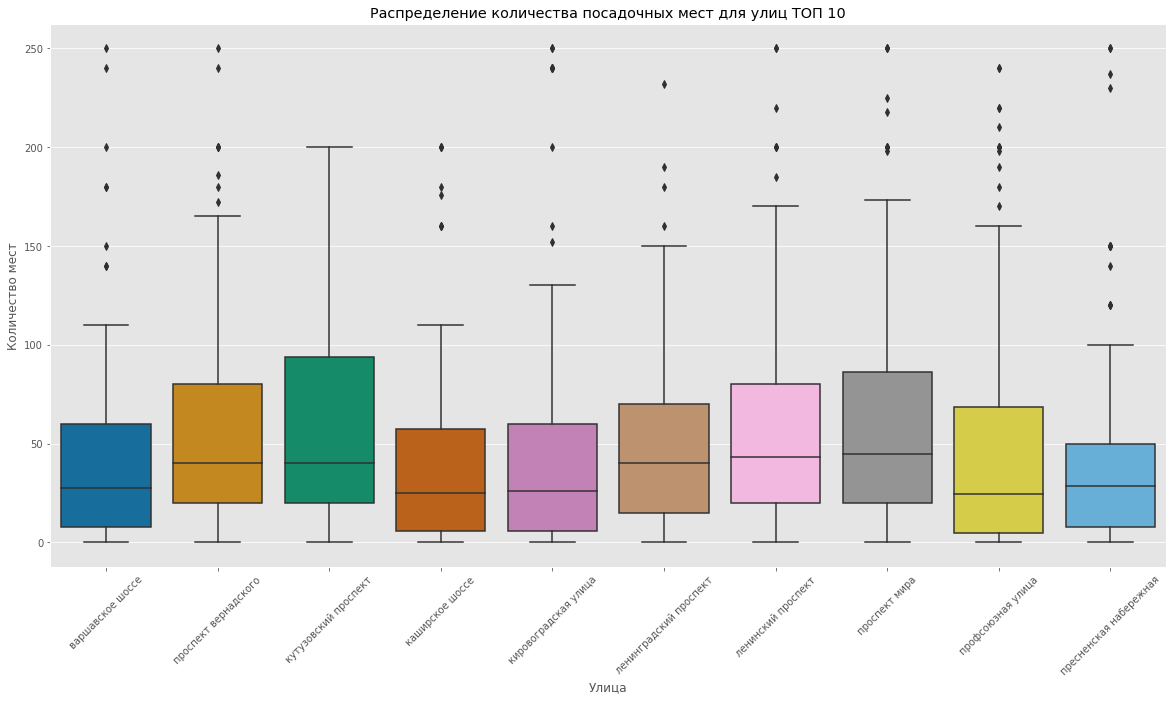

In [41]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation= 45)
sb.boxplot(x="street", y="number", data=rest_top_10)
plt.title('Распределение количества посадочных мест для улиц ТОП 10')
plt.xlabel('Улица')
plt.ylabel('Количество мест');
print(rest_top_10['number'].describe())

Основная часть объектов на улцах с бОльшим количеством заведений имеет от 10 до 75 посадочных мест. Заведений с более широкими возможностями посадки - значительно меньше. Вероятно, высокая конкуренция не оставляет смысла создавать пространства с бОльшей плотностью.

## Общие выводы

Открывая заведение непривычного для пользователя формата, необходимо реализовывать его по привычному сценарию: придерживаться привычного вида заведения, в популярной локации. Основываясь на успешном опыте действующих организаций, можно прогнозировать возможности для сетевого развития.
Помимо важных составляющий бизнес-планирования (определение целевой аудитории, целевой политики), опираясь на анализ заведений Москвы, можно сделать следующие выводы и рекомендации:
1. Наиболее перспективный вид заведения - кафе быстрого обслуживания. С ограниченным ассортиментом продукции, акцентом на высокую скоростью обслуживания и уровнем цен средним и ниже среднего. 

2. Район расположения - Пресненский. Центральный район с большим количеством заведений, но, так же, с наличием улиц с одним заведением. Такое количество заведений дает возможность сделать вывод о успешности конкурентов, высокой проходимости и выборе пользователей. Если заведения открываются, значит они кому-то нужны. Относительно небольшое количество посадочных мест может быть основанием для прогнозирования притока клиентов рядом стоящих заведений, которым не хватило места. Для первого времени узнаваемость конкурентов может значительно повысить интерес к новому заведению рядом со знакомым. Органичное продвижение бренда и узнаваемости позволит привлечь гостей в заведение быстрее и дешевле.

3. Рекомендованное количество посадочных мест: 30 - 50. Харакерное количество для данного района и данного вида заведения, предполагающего быстрое обслуживание и короткий визит.

Рекомендованные параметры для организации заведения - характерны для заведений сетевого распространения. Разитие сети в дальнейшем возможно.


Презентация: <https://yadi.sk/i/WaSlSbx0zjFE_g>